In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import gco

In [7]:
img1 = cv.imread('data/im6.png')
img2 = cv.imread('data/im2.png')

H, W, D = img1.shape
print(H, W)
length = 65
disparity = np.arange(length)

smooth = np.zeros((length, length))
for i in range(length):
    for j in range(length):
        if i != j:
            smooth[i][j] = abs(i - j)

unary = np.zeros((H, W, length))

# get distance
def lse(c1, c2):
    return (abs(int(c1[0]) - int(c2[0])) + abs(int(c1[1]) - int(c2[1])) + abs(int(c1[2]) - int(c2[2]))) / 10


for i in range(H):
    for j in range(W):
        for k in range(length):
            if j + k < W:
                unary[i, j, k] = lse(img1[i, j, :], img2[i, j + k, :])

print('fine to compute unary')


375 450
fine to compute unary


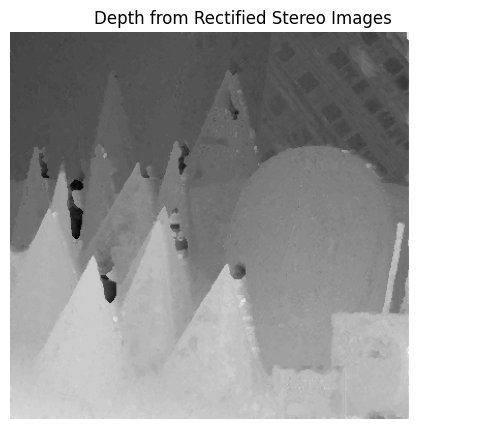

In [8]:
labels = gco.cut_grid_graph_simple(unary, smooth * 0.1, connect=8, n_iter=-1)
labels = labels.reshape(H, W)
plt.figure(num=1, dpi=100, figsize=(6, 6))
plt.imshow(labels, cmap='gray')
plt.title('Depth from Rectified Stereo Images')
plt.imshow(labels, cmap="gray")
plt.axis("off")
plt.show()

# There is some noise in the depth result.
# This is because in graph cuts, the constraints on pv and pc are simple and few, which means that program can not obtain optimal results.

# The best result is when lambda=0.1.

# One exception is that I set lambda in a small scale, the cut_grid_graph_simple will cause kernel restart. I don't know why this happens. And I set algorithm='swap' in the cut_grid_graph_simple, then it will be ok. But the result is not good.

# Then I change lambda to a range, and the cut func will work. And the result is good.

In [4]:
# pairwise2 = np.zeros([num_label, num_label])
# for i in range(num_label):
#     for j in range(num_label):
#         pairwise2[i, j] = abs(i - j)
# 
# # m_lambda = 0.1
# n_labels = pygco.cut_grid_graph_simple(unary, pairwise2 * 0.01, connect=6, n_iter=-1, algorithm='swap')
# n_labels = n_labels.reshape(H, W)
# 
# plt.imshow(n_labels, cmap='gray')
# plt.title(f'm_lambda = {m_lambda}')
# plt.show()